## prophet

In [1]:
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [4]:
data = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_gender_longform_0805_test2.csv', encoding='cp949')
data.head()

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex,frequency
0,강원,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,1,3.0
1,강원,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,2,3.0
2,강원,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,1,2.0
3,강원,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,2,0.0
4,강원,2012-01-03,2012,1,3,1,0.0,0.027778,1021.546667,1025.766667,...,72.0,-13.0,5.0,-4.009383,18.0,89.595833,54.223703,9.787500,1,0.0


In [20]:
df = data[['tma','frequency']]
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df.ds)
data['tma'] = pd.to_datetime(data.tma)
df.index = data['tma']
df.head()

C:\Users\dltmf\AppData\Local\Temp\ipykernel_29508\1152833980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df.ds)


,ds,y
tma,,
2012-01-01,2012-01-01,3.0
2012-01-01,2012-01-01,3.0
2012-01-02,2012-01-02,2.0
2012-01-02,2012-01-02,0.0
2012-01-03,2012-01-03,0.0


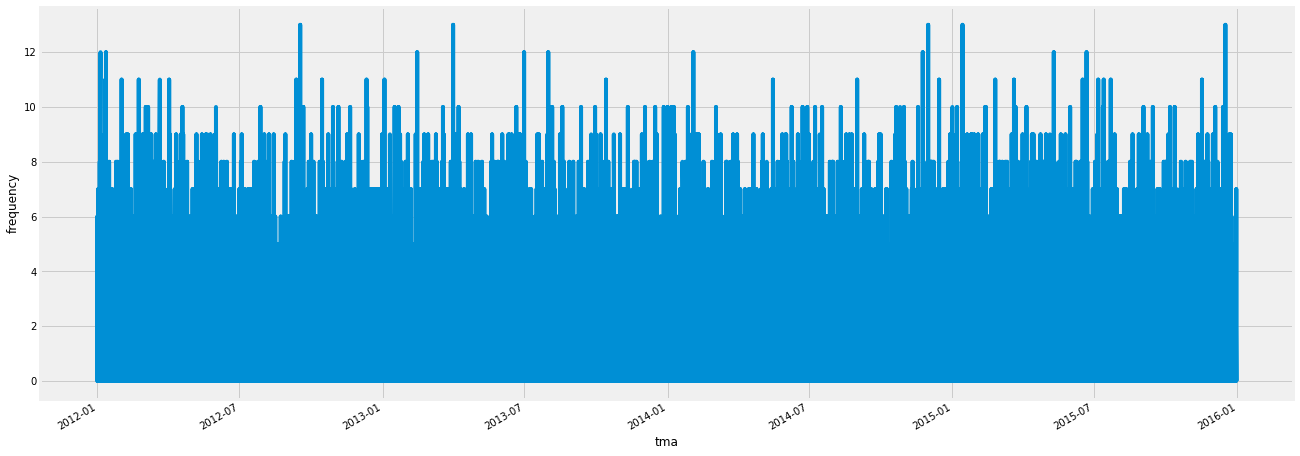

In [24]:
# frequency 시각화
ax = df['y'].plot(figsize = (20,8))
ax.set_ylabel('frequency')
plt.show()

In [7]:
model = Prophet()
model.fit(df)

23:07:07 - cmdstanpy - INFO - Chain [1] start processing
23:07:20 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
y2016 = model.make_future_dataframe(periods = 366) # 윤년이므로 1일 더 필요
forecast = model.predict(y2016)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,1.416194,-0.883852,3.190073,1.416194,1.416194,-0.307391,-0.307391,-0.307391,-0.298211,-0.298211,-0.298211,-0.009180,-0.009180,-0.009180,0.0,0.0,0.0,1.108803
1,2012-01-02,1.415815,-0.336861,3.852545,1.415815,1.415815,0.311596,0.311596,0.311596,0.317856,0.317856,0.317856,-0.006260,-0.006260,-0.006260,0.0,0.0,0.0,1.727411
2,2012-01-03,1.415437,-0.735995,3.612752,1.415437,1.415437,0.126516,0.126516,0.126516,0.129658,0.129658,0.129658,-0.003142,-0.003142,-0.003142,0.0,0.0,0.0,1.541953
3,2012-01-04,1.415058,-0.525342,3.631276,1.415058,1.415058,0.109333,0.109333,0.109333,0.109207,0.109207,0.109207,0.000126,0.000126,0.000126,0.0,0.0,0.0,1.524391
4,2012-01-05,1.414679,-0.790120,3.506161,1.414679,1.414679,0.036804,0.036804,0.036804,0.033309,0.033309,0.033309,0.003495,0.003495,0.003495,0.0,0.0,0.0,1.451484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-12-27,1.511428,-0.578579,3.740689,1.494319,1.530052,0.111311,0.111311,0.111311,0.129658,0.129658,0.129658,-0.018347,-0.018347,-0.018347,0.0,0.0,0.0,1.622739
1823,2016-12-28,1.511525,-0.304895,3.642763,1.494314,1.530213,0.092452,0.092452,0.092452,0.109207,0.109207,0.109207,-0.016756,-0.016756,-0.016756,0.0,0.0,0.0,1.603976
1824,2016-12-29,1.511622,-0.580272,3.735453,1.494325,1.530374,0.018521,0.018521,0.018521,0.033309,0.033309,0.033309,-0.014788,-0.014788,-0.014788,0.0,0.0,0.0,1.530143
1825,2016-12-30,1.511719,-0.653233,3.726569,1.494338,1.530535,-0.044685,-0.044685,-0.044685,-0.032204,-0.032204,-0.032204,-0.012481,-0.012481,-0.012481,0.0,0.0,0.0,1.467034


In [28]:
# 예측 결과 확인
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2012-01-01,1.108803,-0.883852,3.190073
1,2012-01-02,1.727411,-0.336861,3.852545
2,2012-01-03,1.541953,-0.735995,3.612752
3,2012-01-04,1.524391,-0.525342,3.631276
4,2012-01-05,1.451484,-0.790120,3.506161
...,...,...,...,...
1822,2016-12-27,1.622739,-0.578579,3.740689
1823,2016-12-28,1.603976,-0.304895,3.642763
1824,2016-12-29,1.530143,-0.580272,3.735453
1825,2016-12-30,1.467034,-0.653233,3.726569


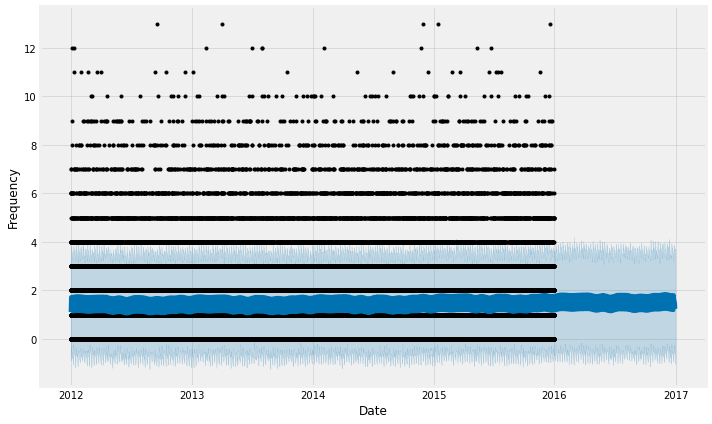

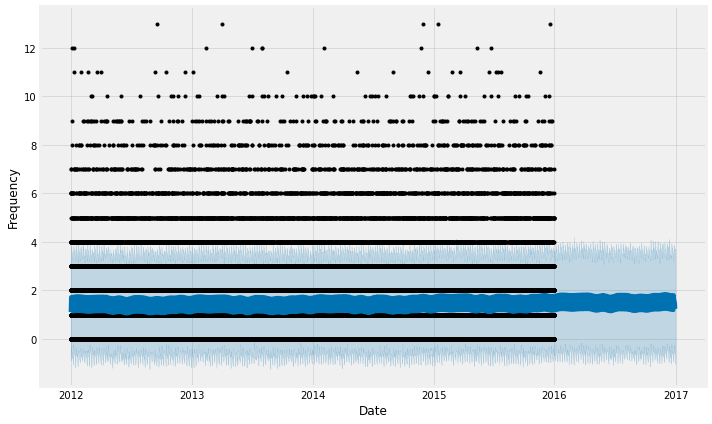

In [30]:
# 예측값 시각화
model.plot(forecast, xlabel='Date',ylabel='Frequency')

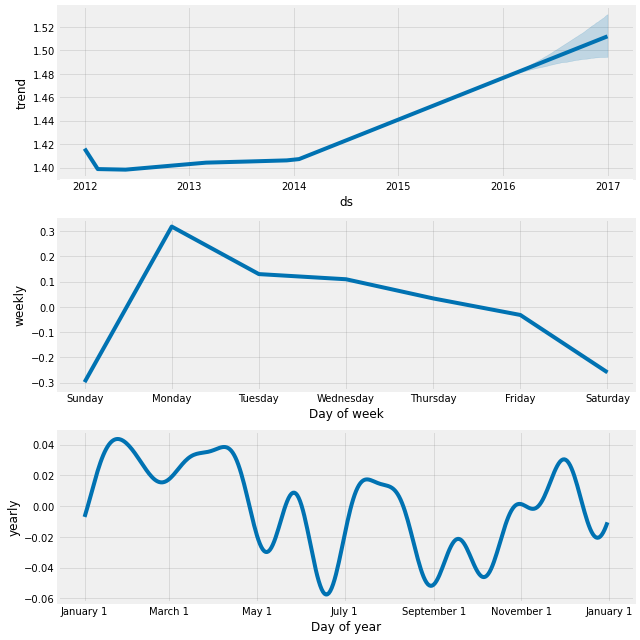

In [31]:
fig2 = model.plot_components(forecast)
plt.show()

## variable selection (변수선택법 - 단계적선택법 적용)

In [8]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [67]:
# df = data.copy()

# area column encoding
encoder = LabelEncoder()
data['area_encoded'] = encoder.fit_transform(data.area)

# feature scaling
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(data.drop(['area','tma','frequency'], axis=1)), columns = data.drop(['area','tma','frequency'], axis=1).columns.tolist())
df

,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,min_ps,so2,...,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex,area_encoded
0,0.0,0.0,0.000000,1.000000,0.0,0.000720,0.973213,0.974701,0.969193,0.449928,...,0.65,0.328125,0.273305,0.245424,0.410000,0.151574,0.050145,0.024604,0.0,0.0
1,0.0,0.0,0.000000,1.000000,0.0,0.000720,0.973213,0.974701,0.969193,0.449928,...,0.65,0.328125,0.273305,0.245424,0.410000,0.151574,0.050145,0.024604,1.0,0.0
2,0.0,0.0,0.033333,0.000000,0.0,0.000207,0.978291,0.979575,0.976210,0.320045,...,0.68,0.224609,0.252119,0.222254,0.553333,0.121529,0.057496,0.026561,0.0,0.0
3,0.0,0.0,0.033333,0.000000,0.0,0.000207,0.978291,0.979575,0.976210,0.320045,...,0.68,0.224609,0.252119,0.222254,0.553333,0.121529,0.057496,0.026561,1.0,0.0
4,0.0,0.0,0.066667,0.166667,0.0,0.000115,0.968866,0.973282,0.964634,0.339174,...,0.72,0.216797,0.273305,0.209194,0.600000,0.154984,0.092593,0.014214,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,1.0,1.0,0.933333,0.166667,0.0,0.000000,0.290169,0.466077,0.000000,0.216243,...,0.60,0.197266,0.252119,0.233623,0.600000,0.146201,0.090722,0.075067,1.0,1.0
49670,1.0,1.0,0.966667,0.333333,0.0,0.003814,0.984941,0.988153,0.981502,0.214194,...,0.54,0.275391,0.279661,0.275875,0.510000,0.072994,0.082007,0.092385,0.0,1.0
49671,1.0,1.0,0.966667,0.333333,0.0,0.003814,0.984941,0.988153,0.981502,0.214194,...,0.54,0.275391,0.279661,0.275875,0.510000,0.072994,0.082007,0.092385,1.0,1.0
49672,1.0,1.0,1.000000,0.500000,0.0,0.000399,0.986149,0.989263,0.982526,0.207161,...,0.55,0.392578,0.296610,0.310392,0.336667,0.056550,0.128487,0.095850,0.0,1.0


In [63]:
# 독립변수 리스트 생성
variables = df.drop(['yyyy','dd','pm10','elderly_pop','D/R','pm10_3b','pm10_31b'], axis=1).columns.tolist()
y = data['frequency']

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

C:\Users\dltmf\AppData\Local\Temp\ipykernel_29508\2154398997.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\dltmf\AppData\Local\Temp\ipykernel_29508\2154398997.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\dltmf\AppData\Local\Temp\ipykernel_29508\2154398997.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\dltmf\AppData\Local\Temp\ipykernel_29508\2154398997.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a

In [64]:
selected_variables

['total_pop',
 'weekday',
 'avg_age',
 'sex',
 'area_encoded',
 'elderly_ratio',
 'so2',
 'min_ps',
 'diff_hum',
 'max_hum',
 'heat_wave']

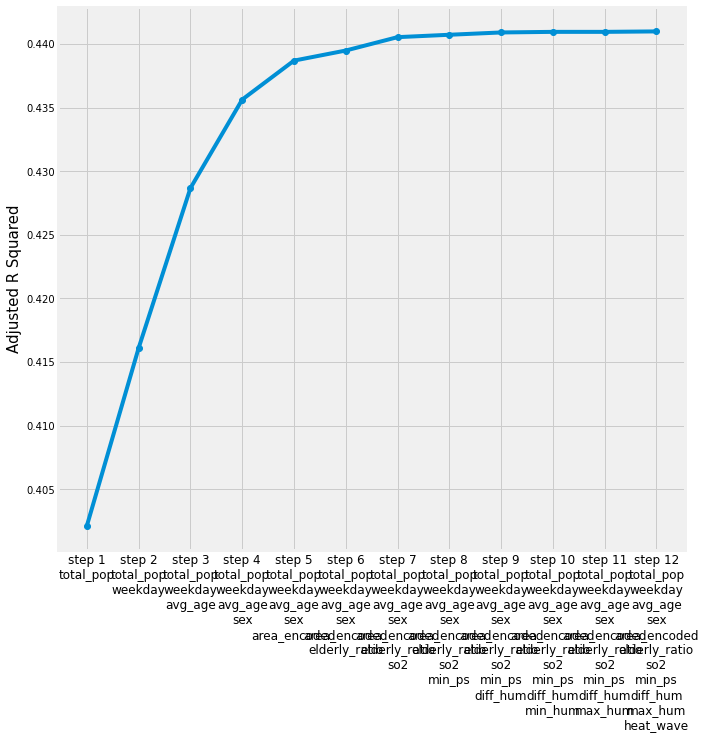

In [65]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## LSTM
- https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/

In [1]:
# 패키지 추가 import

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dltmf\anaconda3\envs\pycaret\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_gender_longform_0805_test2.csv', encoding='cp949')
data['tma'] = pd.to_datetime(data.tma)
data.head()

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex,frequency
0,강원,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,1,3.0
1,강원,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,2,3.0
2,강원,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,1,2.0
3,강원,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,2,0.0
4,강원,2012-01-03,2012,1,3,1,0.0,0.027778,1021.546667,1025.766667,...,72.0,-13.0,5.0,-4.009383,18.0,89.595833,54.223703,9.787500,1,0.0


In [3]:
df = data.copy()

In [4]:
sns

<module 'seaborn' from 'C:\\Users\\dltmf\\anaconda3\\envs\\pycaret\\lib\\site-packages\\seaborn\\__init__.py'>

In [5]:
print(sns.__version__)

0.11.2


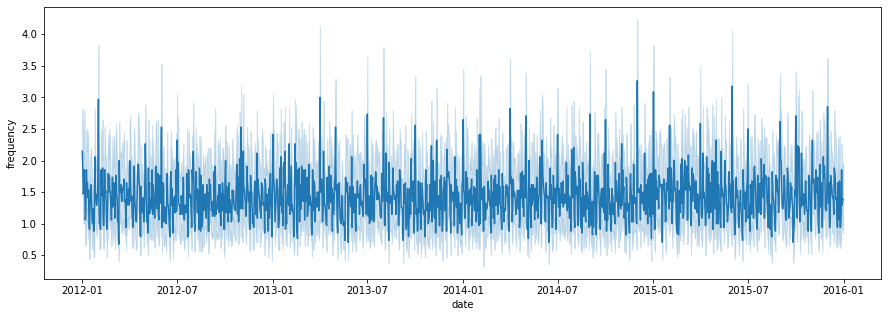

In [6]:
plt.figure(figsize=(15, 5))
sns.lineplot(y=df['frequency'], x=df['tma'])

plt.xlabel('date')
plt.ylabel('frequency')

plt.show()
plt.close()

In [9]:
df.sort_index(ascending=False).reset_index(drop=True)

# area column encoding
encoder = LabelEncoder()
df['area_encoded'] = encoder.fit_transform(df.area)

# feature scaling - Normalization - 0,1 사이의 값으로 변환
scaler = MinMaxScaler()
scale_cols = df.drop(['area','tma','frequency'], axis=1).columns.tolist()
df_scaled = pd.DataFrame(scaler.fit_transform(df[scale_cols]), columns = scale_cols)
df_scaled['frequency'] = df['frequency']
df_scaled

,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,min_ps,so2,...,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex,area_encoded,frequency
0,0.0,0.0,0.000000,1.000000,0.0,0.000720,0.973213,0.974701,0.969193,0.449928,...,0.328125,0.273305,0.245424,0.410000,0.151574,0.050145,0.024604,0.0,0.0,3.0
1,0.0,0.0,0.000000,1.000000,0.0,0.000720,0.973213,0.974701,0.969193,0.449928,...,0.328125,0.273305,0.245424,0.410000,0.151574,0.050145,0.024604,1.0,0.0,3.0
2,0.0,0.0,0.033333,0.000000,0.0,0.000207,0.978291,0.979575,0.976210,0.320045,...,0.224609,0.252119,0.222254,0.553333,0.121529,0.057496,0.026561,0.0,0.0,2.0
3,0.0,0.0,0.033333,0.000000,0.0,0.000207,0.978291,0.979575,0.976210,0.320045,...,0.224609,0.252119,0.222254,0.553333,0.121529,0.057496,0.026561,1.0,0.0,0.0
4,0.0,0.0,0.066667,0.166667,0.0,0.000115,0.968866,0.973282,0.964634,0.339174,...,0.216797,0.273305,0.209194,0.600000,0.154984,0.092593,0.014214,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,1.0,1.0,0.933333,0.166667,0.0,0.000000,0.290169,0.466077,0.000000,0.216243,...,0.197266,0.252119,0.233623,0.600000,0.146201,0.090722,0.075067,1.0,1.0,2.0
49670,1.0,1.0,0.966667,0.333333,0.0,0.003814,0.984941,0.988153,0.981502,0.214194,...,0.275391,0.279661,0.275875,0.510000,0.072994,0.082007,0.092385,0.0,1.0,2.0
49671,1.0,1.0,0.966667,0.333333,0.0,0.003814,0.984941,0.988153,0.981502,0.214194,...,0.275391,0.279661,0.275875,0.510000,0.072994,0.082007,0.092385,1.0,1.0,1.0
49672,1.0,1.0,1.000000,0.500000,0.0,0.000399,0.986149,0.989263,0.982526,0.207161,...,0.392578,0.296610,0.310392,0.336667,0.056550,0.128487,0.095850,0.0,1.0,1.0


## 시계열 데이터의 데이터셋 분리
- window_size : 과거 기간의 주가 데이터에 기반하여 다음날의 종가를 예측할 것인가를 정하는 parameter
- test_size = 200 : 학습은 과거부터 200일 이전의 데이터를 학습하게 되고, TEST를 위해서 이후 100일의 데이터로 모델이 주가를 예측하도록 한 다음, 실제 데이터와 오차가 얼마나 있는지 확인

In [10]:
TEST_SIZE = 200 
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [11]:
def make_dataset(data, label, window_size= WINDOW_SIZE):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

### train/test split

In [12]:
from sklearn.model_selection import train_test_split

feature_cols = df_scaled.drop('frequency',axis=1).columns.tolist()
label_cols = ['frequency']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((39563, 20, 33), (9891, 20, 33))

In [13]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 33), (200, 1))

In [14]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 33), (180, 1))

In [15]:
train_feature.shape[1]

20

## 모형 학습

In [16]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

In [31]:
model = Sequential()
model.add(LSTM(32, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )

model.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )

model.add(LSTM(8, 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [32]:
import os

model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=[tf.keras.metrics.RootMeanSquaredError(), R_squared]
             )
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=10,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint],
                    verbose = 2)

Epoch 1/200

Epoch 1: val_loss improved from inf to 1.68486, saving model to model\tmp_checkpoint.h5
3957/3957 - 83s - loss: 1.7040 - root_mean_squared_error: 1.3054 - R_squared: -inf - val_loss: 1.6849 - val_root_mean_squared_error: 1.2980 - val_R_squared: -inf - 83s/epoch - 21ms/step
Epoch 2/200

Epoch 2: val_loss improved from 1.68486 to 1.57556, saving model to model\tmp_checkpoint.h5
3957/3957 - 78s - loss: 1.5948 - root_mean_squared_error: 1.2628 - R_squared: 0.1563 - val_loss: 1.5756 - val_root_mean_squared_error: 1.2552 - val_R_squared: -inf - 78s/epoch - 20ms/step
Epoch 3/200

Epoch 3: val_loss did not improve from 1.57556
3957/3957 - 71s - loss: 1.5742 - root_mean_squared_error: 1.2547 - R_squared: 0.1655 - val_loss: 1.5983 - val_root_mean_squared_error: 1.2642 - val_R_squared: -inf - 71s/epoch - 18ms/step
Epoch 4/200

Epoch 4: val_loss improved from 1.57556 to 1.56608, saving model to model\tmp_checkpoint.h5
3957/3957 - 81s - loss: 1.5659 - root_mean_squared_error: 1.2513 - 

## predict

In [33]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(180, 1)

In [34]:
pred

array([[0.8815409 ],
       [0.9517139 ],
       [0.89743674],
       [0.92325366],
       [0.9668775 ],
       [1.2346358 ],
       [1.0313807 ],
       [1.1090741 ],
       [1.0024626 ],
       [1.0305246 ],
       [0.95268226],
       [0.9756382 ],
       [0.8796832 ],
       [0.85452217],
       [0.7879443 ],
       [0.79741454],
       [0.82564   ],
       [0.8678155 ],
       [0.92312384],
       [1.0929433 ],
       [0.9964259 ],
       [1.0887711 ],
       [0.97420406],
       [0.9951955 ],
       [0.91866577],
       [0.8945539 ],
       [0.80741745],
       [0.79067993],
       [0.7344404 ],
       [0.733763  ],
       [0.73008525],
       [0.7623402 ],
       [0.8658005 ],
       [1.0150635 ],
       [0.92007023],
       [0.94368017],
       [0.9203055 ],
       [0.9417325 ],
       [0.884301  ],
       [0.87225544],
       [0.8259833 ],
       [0.81020343],
       [0.78442883],
       [0.7974591 ],
       [0.858126  ],
       [0.88839865],
       [0.9738543 ],
       [1.037

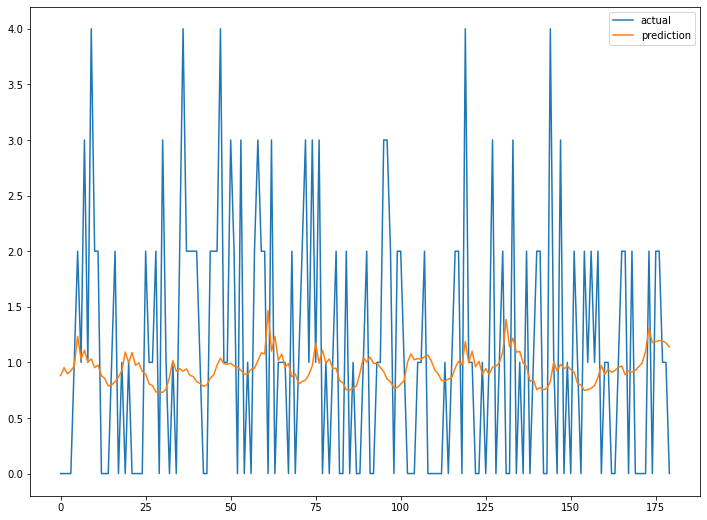

In [35]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [36]:
# 테스트 데이터 입력
scores = model.evaluate(x_valid, y_valid)
print('test_loss: ', scores[0])
print('test_rmse: ', scores[1])
print('test_r2: ', scores[2])

310/310 [==============================] - 4s 12ms/step - loss: 1.5385 - root_mean_squared_error: 1.2404 - R_squared: -inf
test_loss:  1.5385221242904663
test_rmse:  1.240371823310852
test_r2:  -inf


In [30]:
# 관찰된 metric 값들을 확인함
for i in range(len(scores)):
    print("%s: %.3f" % (model.metrics_names[i], scores[i]))

loss: 1.537
root_mean_squared_error: 1.240
R_squared: -inf
